In [139]:
import math
import numpy as np
import numpy.linalg as la
from importlib import reload
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import beta, norm, gamma, kstest, alpha, t, rice, weibull_min
a4_dims = (11.7, 8.27)

In [2]:
x = np.array([1,0,0])
la.norm(x)

1.0

In [26]:
import src.analysis.utils as ana_utils
reload(ana_utils)

<module 'src.analysis.utils' from '/home/garro/Projects/masterarbeit/src/analysis/utils.py'>

In [35]:
xs = ana_utils.read_improvement_probs('/media/sf_VBoxshare/Experimente/output/static_2/gsat.db', 1)
distr = np.array([p for _, p in xs])
print(distr)
d = ana_utils.approximate_stationary_distr(distr[0], eps=2**(-10))
d

[[0.         1.         1.         ... 0.33333333 1.         1.        ]
 [0.         1.         0.88888889 ... 1.         1.         1.        ]
 [0.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.         1.         1.         ... 0.76666667 0.5        1.        ]
 [0.         1.         0.83333333 ... 1.         1.         1.        ]
 [0.         1.         1.         ... 1.         1.         1.        ]]


(array([2.03854557e-01, 2.03312650e-01, 1.15471250e-04, 1.10534493e-04,
        1.09531173e-04, 1.04849511e-04, 1.00829608e-04, 9.94457319e-05,
        9.41038631e-05, 8.94588519e-05, 8.69939564e-05, 9.08931719e-05,
        9.31266542e-05, 8.76022332e-05, 8.46487243e-05, 7.96162869e-05,
        7.39605207e-05, 7.22624596e-05, 7.41915459e-05, 7.86171302e-05,
        8.27045283e-05, 8.34310161e-05, 8.60919432e-05, 8.59405939e-05,
        8.37977153e-05, 8.73059641e-05, 9.47229435e-05, 9.63964030e-05,
        9.26799856e-05, 9.74842365e-05, 1.13079387e-04, 1.40121109e-04,
        1.65195736e-04, 1.84887183e-04, 1.92212132e-04, 1.85580939e-04,
        1.82362325e-04, 1.83439407e-04, 1.95289805e-04, 2.04367331e-04,
        2.05378921e-04, 2.05540892e-04, 2.11407864e-04, 2.21402882e-04,
        2.39219134e-04, 2.41995551e-04, 2.38471614e-04, 2.46170066e-04,
        3.03483009e-04, 3.88801277e-04, 5.09744045e-04, 7.41357013e-04,
        1.25331496e-03, 2.14579899e-03, 4.29612843e-03, 1.057813

In [192]:
xs = ana_utils.get_tms_entropy(
    '/media/sf_VBoxshare/Experimente/output/static_2/walksat.db', 2,
    eps=2**(-17), max_loops=20000
)

In [193]:
all_data = []
for _, h, c in xs:
    if c and h > 0.01:
        all_data.append(h)
print(len(all_data))

60


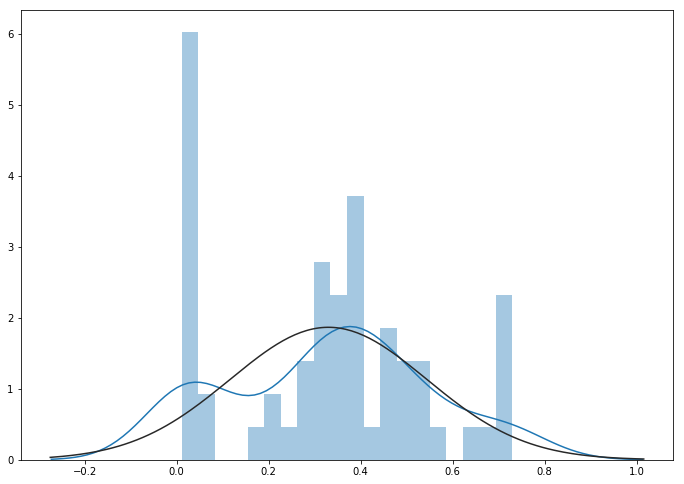

In [194]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(all_data, bins=20, norm_hist=True, fit=t)
#xs = np.arange(0.0,1,0.0001)
#theta_beta = beta.fit(plot_data)
#ax.plot(xs, beta.pdf(xs, *theta_beta)) #3.28, 1.714, loc=0.9652, scale=0.0276))

In [47]:
theta_beta = beta.fit(all_data)
theta_norm = norm.fit(all_data)
theta_gamma = gamma.fit(all_data)

In [48]:
theta_beta, theta_norm, theta_gamma

((2.1859282943175296,
  1.8828847442871266,
  -0.027588571199210293,
  0.9632390540094549),
 (0.4924819638761282, 0.21259375287863116),
 (322.6520925509253, -3.349424907155054, 0.011908936851596066))

In [49]:
ana_utils.log_likelihood(all_data, lambda x: beta.pdf(x,*theta_beta))

1.2702162650610547

In [50]:
ana_utils.log_likelihood(all_data, lambda x: norm.pdf(x,*theta_norm))

1.282190959768768

In [51]:
ana_utils.log_likelihood(all_data, lambda x: gamma.pdf(x,*theta_gamma))

1.272594476770472

In [52]:
kstest(all_data, lambda x: beta.cdf(x, *theta_beta))

KstestResult(statistic=0.08180418109551679, pvalue=0.4971641657690502)

In [146]:
distr = beta

for i in range(1,11):
    xs = ana_utils.get_tms_entropy(
        '/media/sf_VBoxshare/Experimente/output/static_2/gsat.db', i,
        eps=2**(-10), max_loops=20000
    )
                                  
    all_data = []
    for _, h, conv in xs:
        if conv and h > 0.01:
            all_data.append(h)
        
    theta = distr.fit(all_data)
    res = kstest(all_data, lambda x: distr.cdf(x,*theta))
    print(res.statistic)
    print('Convergent: ', len(all_data))
    if res.statistic >= 0.1358:
        print('Fail')
    else:
        print('Passed')
    

0.07950907526607581
Convergent:  97
Passed
0.07182394411311865
Convergent:  98
Passed
0.04953749563294885
Convergent:  96
Passed
0.07220539886793498
Convergent:  100
Passed
0.0740747073313614
Convergent:  99
Passed
0.04034213063226094
Convergent:  95
Passed
0.05881624804946434
Convergent:  99
Passed
0.061134783293816386
Convergent:  98
Passed
0.07168429651724229
Convergent:  99
Passed
0.08093033975367259
Convergent:  96
Passed
